# IFN619 - Assignment 1 - Part B

## Foundational Techniques

#### INSTRUCTIONS

1. Complete the section below with your personal details (and run the cell)
2. Complete the full **QDAVI** data analytics cycle for both questions. Ensure that you complete the cycle by addressing the question with your insights.
3. Ensure that you use markdown cells to document your thinking and decision making for each stage of the process. Be clear on how your decisions are working towards addressing the question.
4. Ensure that your code runs without errors, and that your results are appropriate for the question.
5. Use comments in your code to explain what you are doing

In [1]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.core.display import display, HTML

first_name = "Amit"
last_name = "Dugh"
student_number = "n11009594"

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

---

## QUESTION 1

#### Question: 

Using *Queensland Health* waste water surveilance data, identify regions where genetic material has been detected in waste water over a 6 month period. What insights could be gained from this data and how might the Queensland Government use them?

#### Data:

[Queensland wastewater surveillance for SARS-CoV-2 in 2020](https://www.data.qld.gov.au/dataset/queensland-wastewater-surveillance-for-sars-cov-2-in-2020/resource/0e7a7d67-435c-4d24-9e6f-23c28a6a8cff)


In [2]:
# import libraries for this question here
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests
import json
import seaborn as sns
import numpy as np
from datetime import datetime

### 1.1 Question

*## I look forward to import the data and apply the QDAVI methodology. So the Question is what insights can be drawn from the given dataset. Depending on the insights, how can the QLD government focus their resources to get the best results of efforts being put in.  ##*

### My Thought Process
----
In order to ask the question, First, I need to understand the data. The information provided can be described as results of a test performed on detecting genetic material related to the SARS-COV-2 virus on wastewater collected from various locations all over QLD(categorical - Yes / No) over six months.

Online Research Links with critical points:
"Sewage monitoring is the UK’s next defence against covid-19" https://www.bmj.com/content/370/bmj.m2599.long
 - It provides an early warning system to help local authorities control local hotspots.
 - A similar system was used in the past by Isreal for Polio.

From a big picture standpoint, the data provides a change in detection of the SARS-CoV-2 virus at specific wastewater sampling points throughout Queensland. The insights derived from the data can be used by Queensland Health and government authorities, combined with other specific COVID-19 information to decide on a response to curb the spread.

Let's quickly review the 5 Ws:
 - WHO - Public at large, businesses, Queensland Health, and Queensland Administration are the stakeholders who can benefit from the data provided.
 - WHAT - Insights from data can act as an early warning system for potential hotspots in the community.
 - WHERE - The information is relevant from July to December 2020, throughout Queensland for various cities and suburbs.
 - WHEN - The wastewater samples are tested on a regular basis.
 - WHY - The public at large is concerned about their own health and of dear ones. They can benefit by being vigilant based on the information provided. The businesses are concerned about the revenue impact from lockdowns and may be interested in such data. Queensland administration and Health can benefit by combining this data with other testing data to prepare a response to control COVID-19 spread.


### My Question - Provide a One-page insight with visualisation for key stakeholders with sites and populations at risk.

 - Key Stake Holders: Public of Queensland, Businesses operating within Queensland, Queensland Health & Queensland Administration

 - Significance: Quick snapshot of the COVID 19 spread risk is associated with people and geography of the spread. It starts as hot spots. The data from wastewater testing can provide insight on COVID-19 potential hotspots and help shape the response of stakeholders.

 - Interpretation: I plan to use the data and develop 2 visualisation to show a matrix of sites with results and the potential number of population at risk of exposure as derived output from the data

## Marking Criteria 
State the question, describe its significance, and identify the key stakeholders 
who have an interest in the question. A description of how you interpret your question
should be provided with the question itself.

### 1.2 Data

### Import the data from URL and store into DataFrame
Use the link provided to review the website and import the file into a dataframe and view it

In [3]:
file = "https://www.data.qld.gov.au/dataset/0db9e032-e3b3-4eb2-8a29-decd89f53072/resource/0e7a7d67-435c-4d24-9e6f-23c28a6a8cff/download/queensland-wastewater-surveillance-for-sars-cov-2-in-2020v1.1.csv"
df=pd.read_csv(file)
df.head()

,Sampling date,Site,Result,Site population,Notes
0,22/07/2020,Coombabah,Non-detect,238437.0,Reanalysed
1,22/07/2020,Elanora,Detect,65315.0,Reanalysed
2,22/07/2020,Loganholme,Detect,205541.0,Reanalysed
3,22/07/2020,Merrimac,Non-detect,151839.0,Reanalysed
4,22/07/2020,Pimpama,Detect,43595.0,Reanalysed


In [4]:
%%html 
<style>
table {float:left} 
</style>

### Data Dictionary

Information about the Dataset that is useful to understand the data provided

|Column         |Type     |Description                                                         |
|---------------|---------|--------------------------------------------------------------------|
|Sampling date  |timestamp|Date of wastewater sample collection                                |
|Site	        |text	  |Name of wastewater treatment plant                                  |
|               |         |(note: a wastewater treatment plant often services multiple suburbs)|
|Result         |text     |                                                                    |		
|Site population|text     |Estimated population serviced by wastewater treatment plant         |
|Notes          |text     |                                                                    |

### Review the shape of the dataset

In [5]:
df.shape

(727, 5)

### Review the dataset types and non-null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sampling date    727 non-null    object 
 1   Site             727 non-null    object 
 2   Result           727 non-null    object 
 3   Site population  712 non-null    float64
 4   Notes            262 non-null    object 
dtypes: float64(1), object(4)
memory usage: 28.5+ KB


### Key points:
   - View the Sampling date on a graph to get an idea about the sampling dates.
   - Site Population and Notes column are showing null values. These columns need to be further investigated.
   - Site Population data type is float and should be corrected to Integer.
   - Review Site column for data values and get the locations covered within the dataset.


### Visualise the Sampling date to understand the data

In [7]:
df['Sampling date'].unique()

array(['22/07/2020', '29/07/2020', '30/07/2020', '31/07/2020',
       '1/08/2020', '2/08/2020', '3/08/2020', '4/08/2020', '5/08/2020',
       '6/08/2020', '7/08/2020', '8/08/2020', '9/08/2020', '10/08/2020',
       '11/08/2020', '12/08/2020', '13/08/2020', '14/08/2020',
       '15/08/2020', '16/08/2020', '17/08/2020', '18/08/2020',
       '19/08/2020', '20/08/2020', '21/08/2020', '24/08/2020',
       '25/08/2020', '26/08/2020', '27/08/2020', '28/08/2020',
       '31/08/2020', '1/09/2020', '2/09/2020', '3/09/2020', '4/09/2020',
       '7/09/2020', '8/09/2020', '9/09/2020', '10/09/2020', '11/09/2020',
       '14/09/2020', '15/09/2020', '16/09/2020', '18/09/2020',
       '21/09/2020', '22/09/2020', '23/09/2020', '25/09/2020',
       '28/09/2020', '29/09/2020', '30/09/2020', '1/10/2020', '2/10/2020',
       '5/10/2020', '6/10/2020', '7/10/2020', '8/10/2020', '9/10/2020',
       '12/10/2020', '13/10/2020', '14/10/2020', '15/10/2020',
       '16/10/2020', '19/10/2020', '20/10/2020', '21/10/2

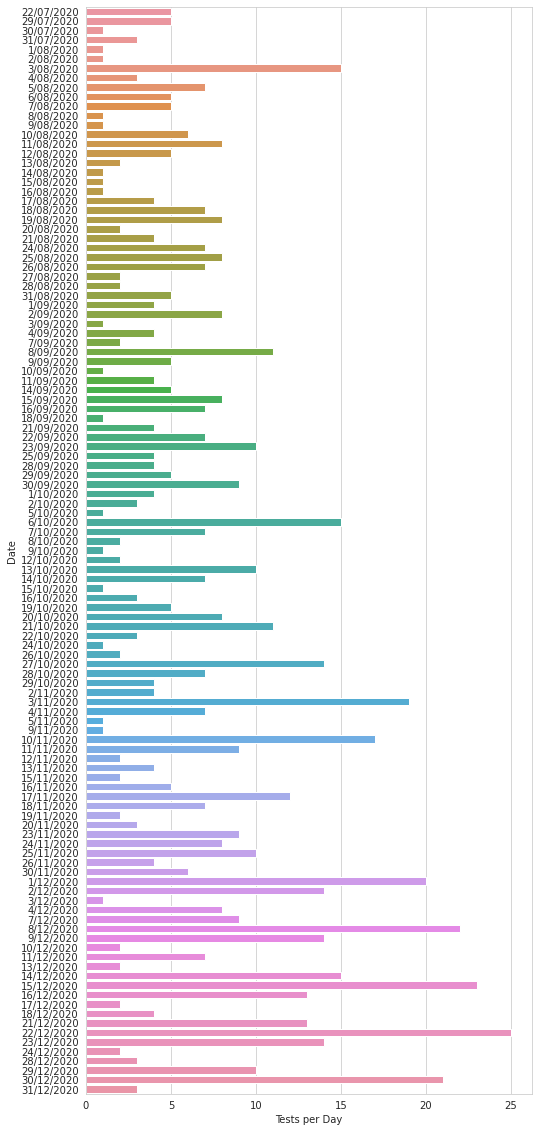

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,20))
sns.countplot(y='Sampling date',data = df)
plt.ylabel('Date')
plt.xlabel('Tests per Day')
plt.yticks(rotation=0)
plt.show()

### Review the Result Column

In [9]:
df.Result.value_counts()

Non-detect    617
Detect        110
Name: Result, dtype: int64

### Note: 
   - Categorical value can be represented as Boolean as there are only two categories like True and False

### Review the Site Column

In [10]:
df.Site.value_counts()

Loganholme                        45
Goodna                            35
Pimpama                           32
Merrimac                          31
Coombabah                         31
Elanora                           31
Wacol                             28
Wynnum                            26
Cairns North                      26
Cairns South                      26
Fairfield                         25
Sandgate                          24
Carole Park                       24
Bundamba                          22
Cannonvale                        22
Pulgul                            19
Noosa                             19
Maroochydore                      19
Stanthorpe                        19
Warwick                           19
Cleveland Bay                     19
Oxley Creek                       19
Luggage Point                     17
Mackay South                      17
Bundaberg                         16
Gibson Island                     15
Rockhampton North                 14
C

### Note:
   - Data looks good in column site, no erroneous entries in the name column

### Review the Site Population Column

In [11]:
df['Site population'].describe()

count       712.000000
mean      87118.018258
std       95222.611694
min        4041.000000
25%       31842.000000
50%       47588.000000
75%      100673.000000
max      504529.000000
Name: Site population, dtype: float64

### Review the Notes Column

In [12]:
df.Notes.value_counts()

Reanalysed    262
Name: Notes, dtype: int64

### Note: 
   - This column can be treated as a Categorical value with Boolean representation as there are only two categories like (reanalyzed) as True and (empty) as False

## Clean/prepare the data for analysis

### Create another Column named "Result_Mapped" with Boolean values

In [13]:
result_map = {'Non-detect': False, 'Detect': True}
df['Result_mapped'] = df['Result'].map(result_map)
df

,Sampling date,Site,Result,Site population,Notes,Result_mapped
0,22/07/2020,Coombabah,Non-detect,238437.0,Reanalysed,False
1,22/07/2020,Elanora,Detect,65315.0,Reanalysed,True
2,22/07/2020,Loganholme,Detect,205541.0,Reanalysed,True
3,22/07/2020,Merrimac,Non-detect,151839.0,Reanalysed,False
4,22/07/2020,Pimpama,Detect,43595.0,Reanalysed,True
...,...,...,...,...,...,...
722,30/12/2020,Wacol,Non-detect,38072.0,NaN,False
723,30/12/2020,Warwick,Detect,12604.0,NaN,True
724,31/12/2020,Carole Park,Non-detect,9404.0,NaN,False
725,31/12/2020,Fairfield,Non-detect,13858.0,NaN,False


### Check Site for which the rows in Column Site Population which are empty

In [14]:
nopopulation = df['Site population'].isnull()
listnopopulation = df[nopopulation]['Site'].unique()
listnopopulation

array(['Cannonvale upstream location A', 'Cannonvale upstream location B'],
      dtype=object)

### Check if all entries of site 'Cannonvale upstream location A' are empty

In [15]:
df[df.Site == "Cannonvale upstream location A"]

,Sampling date,Site,Result,Site population,Notes,Result_mapped
294,19/10/2020,Cannonvale upstream location A,Non-detect,NaN,NaN,False
307,21/10/2020,Cannonvale upstream location A,Non-detect,NaN,NaN,False
326,27/10/2020,Cannonvale upstream location A,Non-detect,NaN,NaN,False
338,28/10/2020,Cannonvale upstream location A,Non-detect,NaN,NaN,False
356,3/11/2020,Cannonvale upstream location A,Non-detect,NaN,NaN,False
373,4/11/2020,Cannonvale upstream location A,Non-detect,NaN,NaN,False
384,10/11/2020,Cannonvale upstream location A,Non-detect,NaN,NaN,False
398,11/11/2020,Cannonvale upstream location A,Non-detect,NaN,NaN,False


### Check if all entries of site 'Cannonvale upstream location B' are empty

In [16]:
df[df.Site == "Cannonvale upstream location B"]

,Sampling date,Site,Result,Site population,Notes,Result_mapped
308,21/10/2020,Cannonvale upstream location B,Non-detect,NaN,NaN,False
327,27/10/2020,Cannonvale upstream location B,Non-detect,NaN,NaN,False
339,28/10/2020,Cannonvale upstream location B,Non-detect,NaN,NaN,False
357,3/11/2020,Cannonvale upstream location B,Non-detect,NaN,NaN,False
374,4/11/2020,Cannonvale upstream location B,Non-detect,NaN,NaN,False
385,10/11/2020,Cannonvale upstream location B,Non-detect,NaN,NaN,False
399,11/11/2020,Cannonvale upstream location B,Non-detect,NaN,NaN,False


### Impute values from Google search for Site population
- Information from "https://www.citypopulation.de/en/australia/queensland/_/314001__airlie_beach_cannonvale/" to impute population as 9334 for Cannonvale

In [17]:
df.loc[df.Site.values=="Cannonvale upstream location A",'Site population'] = 9334
df.loc[df.Site.values=="Cannonvale upstream location B",'Site population'] = 9334

### Change data type for Site Population from Float to Int

In [18]:
df['Site population'] = df['Site population'].astype(int)

### Check all sites have unique populations

In [19]:
df['Site population'].groupby(df.Site).value_counts()

Site                            Site population
Bundaberg                       47787              16
Bundamba                        84942              22
Caboolture South                47207               4
Cairns North                    43924              26
Cairns South                    47588              26
Cannonvale                      8362               22
Cannonvale upstream location A  9334                8
Cannonvale upstream location B  9334                7
Capalaba                        23928               7
Carole Park                     9404               24
Cleveland                       34579               7
Cleveland Bay                   77595              19
Condon                          18319               8
Coombabah                       238437             31
Elanora                         65315              31
Fairfield                       13858              25
Gibson Island                   198244             15
Goodna                          79

### Note:
   - Maroochydore population has 18 entries with 92689 and 1 entry with 13858.

### Review the entries for 'Maroochydore'

In [20]:
df[df.Site == 'Maroochydore']

,Sampling date,Site,Result,Site population,Notes,Result_mapped
86,18/08/2020,Maroochydore,Non-detect,92689,Reanalysed,False
115,25/08/2020,Maroochydore,Detect,92689,Reanalysed,True
135,1/09/2020,Maroochydore,Non-detect,92689,Reanalysed,False
157,8/09/2020,Maroochydore,Non-detect,92689,Reanalysed,False
183,15/09/2020,Maroochydore,Non-detect,92689,Reanalysed,False
202,22/09/2020,Maroochydore,Non-detect,92689,Reanalysed,False
226,29/09/2020,Maroochydore,Non-detect,92689,Reanalysed,False
253,6/10/2020,Maroochydore,Non-detect,92689,NaN,False
277,13/10/2020,Maroochydore,Detect,92689,NaN,True
305,20/10/2020,Maroochydore,Non-detect,92689,NaN,False


### Correct population for 'Maroochydore' at index 662 as 92689

In [21]:
df.iloc[662,df.columns.get_loc('Site population')]=92689

### Change 'Sampling date' datatype to datetime object

In [22]:
from datetime import datetime
df['Sampling date']=pd.to_datetime(df['Sampling date'],format = "%d/%m/%Y")
df

,Sampling date,Site,Result,Site population,Notes,Result_mapped
0,2020-07-22,Coombabah,Non-detect,238437,Reanalysed,False
1,2020-07-22,Elanora,Detect,65315,Reanalysed,True
2,2020-07-22,Loganholme,Detect,205541,Reanalysed,True
3,2020-07-22,Merrimac,Non-detect,151839,Reanalysed,False
4,2020-07-22,Pimpama,Detect,43595,Reanalysed,True
...,...,...,...,...,...,...
722,2020-12-30,Wacol,Non-detect,38072,NaN,False
723,2020-12-30,Warwick,Detect,12604,NaN,True
724,2020-12-31,Carole Park,Non-detect,9404,NaN,False
725,2020-12-31,Fairfield,Non-detect,13858,NaN,False


### Create another column named "Reanalysed_Mapped" with boolean values

In [23]:
reanalysed_map = {np.nan:False, 'Reanalysed': True}
df['Reanalysed_mapped'] = df['Notes'].map(reanalysed_map)
df

,Sampling date,Site,Result,Site population,Notes,Result_mapped,Reanalysed_mapped
0,2020-07-22,Coombabah,Non-detect,238437,Reanalysed,False,True
1,2020-07-22,Elanora,Detect,65315,Reanalysed,True,True
2,2020-07-22,Loganholme,Detect,205541,Reanalysed,True,True
3,2020-07-22,Merrimac,Non-detect,151839,Reanalysed,False,True
4,2020-07-22,Pimpama,Detect,43595,Reanalysed,True,True
...,...,...,...,...,...,...,...
722,2020-12-30,Wacol,Non-detect,38072,NaN,False,False
723,2020-12-30,Warwick,Detect,12604,NaN,True,False
724,2020-12-31,Carole Park,Non-detect,9404,NaN,False,False
725,2020-12-31,Fairfield,Non-detect,13858,NaN,False,False


### Drop columns named Result and Notes as we have new representations of them

In [24]:
df.drop('Notes', axis=1,inplace=True)
df.drop('Result', axis=1,inplace=True)

### Review Duplicates in the dataset

In [25]:
duplicated = df.duplicated()
df[duplicated]

,Sampling date,Site,Site population,Result_mapped,Reanalysed_mapped
713,2020-12-30,Goodna,79621,False,False


### Drop duplicated row

In [26]:
df.drop_duplicates(inplace=True)

### Review data before proceeding


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 726
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sampling date      726 non-null    datetime64[ns]
 1   Site               726 non-null    object        
 2   Site population    726 non-null    int64         
 3   Result_mapped      726 non-null    bool          
 4   Reanalysed_mapped  726 non-null    bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(1)
memory usage: 24.1+ KB


### Note: 
   - df looks good for analysis to be performed on it. 
   - All data categories are as desired.
   - All duplicated dropped.
   - All non-null values imputed.

### 1.3 Analysis

### Analyse the data - ensure that you at least use the required technique

### Last Date with a Note value

In [28]:
df[df.Reanalysed_mapped == True].tail(1)

,Sampling date,Site,Site population,Result_mapped,Reanalysed_mapped
268,2020-10-08,Sandgate,100673,False,True


### Note:
   - After 8th October 2020, no sample was reanalyzed as per comments.
   - We could say the sample analysis procedure was streamlined.

### How many suburbs with no detections of the SARS-CoV-2

In [29]:
sites = df['Site'].unique() # Store all sites in variable sites
detected = df.Result_mapped ==True
sites_detected = df[detected]['Site'].unique() # store all sites in variable sites_detected

print("\nLocations with detection of SARS-CoV-2 genetic material\n",sorted(sites))
print("\nTotal Number of Locations", len(sites))
print("\nTotal number of Locations with detection of SARS-CoV-2 genetic material", len(sites_detected))


Locations with detection of SARS-CoV-2 genetic material
 ['Bundaberg', 'Bundamba', 'Caboolture South', 'Cairns North', 'Cairns South', 'Cannonvale', 'Cannonvale upstream location A', 'Cannonvale upstream location B', 'Capalaba', 'Carole Park', 'Cleveland', 'Cleveland Bay', 'Condon', 'Coombabah', 'Elanora', 'Fairfield', 'Gibson Island', 'Goodna', 'Kawana', 'Loganholme', 'Luggage Point', 'Mackay South', 'Maroochydore', 'Maryborough', 'Merrimac', 'Mount St John', 'Nambour', 'Noosa', 'Oxley Creek', 'Pimpama', 'Port Douglas', 'Pulgul', 'Redcliffe', 'Rockhampton North', 'Sandgate', 'Stanthorpe', 'Thorneside', 'Victoria Point', 'Wacol', 'Warwick', 'Wynnum']

Total Number of Locations 41

Total number of Locations with detection of SARS-CoV-2 genetic material 32


In [30]:
# Use the set functions to derive suburbs with no detections of SARS-CoV-2

sites_undetected = set(sites).difference(set(sites_detected))
sites_undetected = list(sites_undetected)


print("\nLocations with no detection of SARS-CoV-2 genetic material\n",sorted(sites_undetected))
print("\nTotal number of sites with no SARS-CoV-2 genetic material", len(sites_undetected))


Locations with no detection of SARS-CoV-2 genetic material
 ['Caboolture South', 'Cannonvale upstream location A', 'Cannonvale upstream location B', 'Capalaba', 'Kawana', 'Mount St John', 'Noosa', 'Port Douglas', 'Thorneside']

Total number of sites with no SARS-CoV-2 genetic material 9


### Results:
 - Total Number of Locations = 41
 - Total number of Locations with detection of the SARS-CoV-2 genetic material = 32
 - Total number of Locations with no detection of the SARS-CoV-2 genetic material = 9

### View a site data for which we have the SARS-CoV-2 +ve

In [31]:
df[df.Site ==sites_detected[0]].sort_values(by='Sampling date')

,Sampling date,Site,Site population,Result_mapped,Reanalysed_mapped
1,2020-07-22,Elanora,65315,True,True
6,2020-07-29,Elanora,65315,False,True
19,2020-08-03,Elanora,65315,True,True
36,2020-08-05,Elanora,65315,True,True
67,2020-08-12,Elanora,65315,False,True
90,2020-08-19,Elanora,65315,False,True
113,2020-08-25,Elanora,65315,False,True
139,2020-09-02,Elanora,65315,False,True
164,2020-09-09,Elanora,65315,False,True
186,2020-09-16,Elanora,65315,False,True


### Notes:
    - All sites have multiple rows and no particular date when they are sampled

### Combine number of +ve detection vs all tests by date

In [32]:
df_plot=pd.DataFrame()
df_plot['Detected'] = df[df.Result_mapped == True]['Sampling date'].groupby(by=df['Sampling date'].dt.date).count()
df_plot['All_Tests'] = df['Result_mapped'].groupby(by=df['Sampling date'].dt.date).count()
df_plot.head()

,Detected,All_Tests
Sampling date,,
2020-07-22,3,5
2020-07-29,3,5
2020-07-31,2,3
2020-08-03,7,15
2020-08-04,1,3


### Add two column for populations potentially at risk of "Exposure" and "Sampled" by date

In [33]:
df_plot['Exp_Population'] = df[df.Result_mapped == True]['Site population'].groupby(by=df['Sampling date'].dt.date).sum()
df_plot['Sampled_Population'] = df['Site population'].groupby(by=df['Sampling date'].dt.date).sum()
df_plot.head()

,Detected,All_Tests,Exp_Population,Sampled_Population
Sampling date,,,,
2020-07-22,3,5,314451,704727
2020-07-29,3,5,595817,704727
2020-07-31,2,3,285162,516805
2020-08-03,7,15,1213137,2001018
2020-08-04,1,3,13858,263323


### Combine number of +ve detection vs all tests and add two column for populations potentially at risk of "Exposure" and "Sampled" by week

In [34]:
df_plot_week=pd.DataFrame()
df_plot_week['Detected'] = df[df.Result_mapped == True]['Sampling date'].groupby(by=df['Sampling date'].dt.isocalendar().week).count()
df_plot_week['All_Tests'] = df['Result_mapped'].groupby(by=df['Sampling date'].dt.isocalendar().week).count()
df_plot_week['Exp_Population'] = df[df.Result_mapped == True]['Site population'].groupby(by=df['Sampling date'].dt.isocalendar().week).sum()
df_plot_week['Sampled_Population'] = df['Site population'].groupby(by=df['Sampling date'].dt.isocalendar().week).sum()
df_plot_week['Percentage at Risk'] = df_plot_week['Exp_Population']/df_plot_week['Sampled_Population']
df_plot_week.head()

,Detected,All_Tests,Exp_Population,Sampled_Population,Percentage at Risk
week,,,,,
30,3,5,314451,704727,0.446203
31,5,11,880979,1838155,0.479274
32,17,37,2974108,5121253,0.580738
33,4,24,568348,3410718,0.166636
34,5,25,272293,2559726,0.106376


### Add column with Total Population of QLD being sampled at all sites

In [35]:
total_population = int(df['Site population'].groupby(by=df['Site']).unique().sum())
total_population
df_plot['Total_Population']=total_population

In [36]:
df_plot['Date'] = df_plot.index
df_plot.head()

,Detected,All_Tests,Exp_Population,Sampled_Population,Total_Population,Date
Sampling date,,,,,,
2020-07-22,3,5,314451,704727,2925365,2020-07-22
2020-07-29,3,5,595817,704727,2925365,2020-07-29
2020-07-31,2,3,285162,516805,2925365,2020-07-31
2020-08-03,7,15,1213137,2001018,2925365,2020-08-03
2020-08-04,1,3,13858,263323,2925365,2020-08-04


### Top 5 Sites with the SARS-CoV-2 +ve detection by number 

In [37]:
df[df.Result_mapped ==True]['Site'].value_counts().sort_values(ascending=False).head(5)

Goodna          11
Coombabah       10
Loganholme       9
Cairns North     6
Elanora          6
Name: Site, dtype: int64

### Sites at High Risk in order

In [38]:
num_tests_site = df['Site'].value_counts() # number of tests by sites
num_tests_site_positive = df[df.Result_mapped == True]['Site'].value_counts() # number of +ve tests by sites
keys = list(sorted(num_tests_site.index)) # keys with all sites from num_tests_site
risky_sites = dict # initiate risky_sites as dictionary
for i in keys: #Assign keys as key to risky_sites
    risky_sites= {i:0}
for site in num_tests_site.index:
    if site not in num_tests_site_positive.index:
        risk = 0
        risky_sites[site]= risk
    else:
        risk = num_tests_site_positive[site]/num_tests_site[site]
        risky_sites[site] = risk
for k,v in sorted(risky_sites.items(),key = lambda p: p[1],reverse=True): #Print the risky sites in descending order
    print(k,round(v,2))

Goodna 0.32
Coombabah 0.32
Redcliffe 0.25
Nambour 0.25
Fairfield 0.24
Wynnum 0.23
Cairns North 0.23
Loganholme 0.2
Elanora 0.19
Bundaberg 0.19
Cannonvale 0.18
Wacol 0.18
Luggage Point 0.18
Carole Park 0.17
Merrimac 0.16
Cleveland 0.14
Victoria Point 0.14
Bundamba 0.14
Gibson Island 0.13
Pimpama 0.12
Sandgate 0.12
Condon 0.12
Maryborough 0.12
Maroochydore 0.11
Warwick 0.11
Cleveland Bay 0.11
Oxley Creek 0.11
Cairns South 0.08
Rockhampton North 0.07
Mackay South 0.06
Pulgul 0.05
Stanthorpe 0.05
Noosa 0
Cannonvale upstream location A 0
Thorneside 0
Capalaba 0
Cannonvale upstream location B 0
Mount St John 0
Port Douglas 0
Kawana 0
Caboolture South 0


### Notes:
   - Bottom 9 sites show 0 risks as they never tested +ve over the six months.
   - Goodna topped the list along with Coombabah, both coming in at about 32%.
   - Risk is calculated by the number of Positive tests divided by the total number of tests performed from the dataset.

### Total Population by Sites

In [39]:
site_population = df['Site population'].groupby(df.Site).value_counts()
site_population = list(site_population.index)
population = dict # Initialize variable population as dictionary
for i in sites: # Assign sites as keys to population
    population = {i:0}
for line in site_population: # Assign population by site
    k = line[0]
    v = line[1]
    population[k] = v

### Sum of At Risk Population as grouped by Sampling date per week

In [40]:
df[df.Result_mapped==True]['Site population'].groupby(df['Sampling date'].dt.week).sum()


<ipython-input-40-328f32950c12>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df[df.Result_mapped==True]['Site population'].groupby(df['Sampling date'].dt.week).sum()


Sampling date
30     314451
31     880979
32    2974108
33     568348
34     272293
35     692744
36     793240
37     292274
38     422115
39     333506
40     447011
41     157216
42     228667
43       9404
44      35305
45     238437
46     238437
47      79229
48     139299
49     238437
50     285913
51     162137
52     829060
53     464154
Name: Site population, dtype: int64

### 1.4 Visualisation

### Number of tests with positive SARS-CoV-2 genetic material detection by day

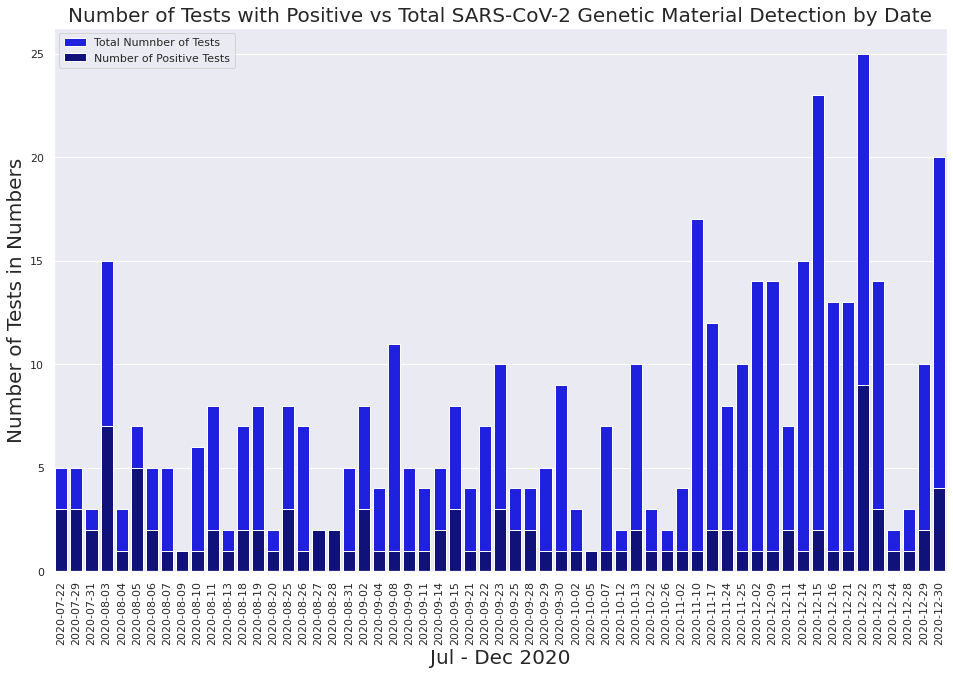

In [41]:
sns.set(context='notebook')

plt.figure(figsize=(16,10))
sns.barplot(x=df_plot.Date,y='All_Tests', data=df_plot,color='blue', edgecolor = 'w', label = 'Total Numnber of Tests')
sns.barplot(x=df_plot.Date,y='Detected', data=df_plot,color='darkblue',edgecolor = 'w', label = 'Number of Positive Tests')
plt.title('Number of Tests with Positive vs Total SARS-CoV-2 Genetic Material Detection by Date',fontsize = 20)
plt.xlabel('Jul - Dec 2020', fontsize = 20)
plt.ylabel('Number of Tests in Numbers', fontsize = 20)
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Population with potential exposure risk by date 

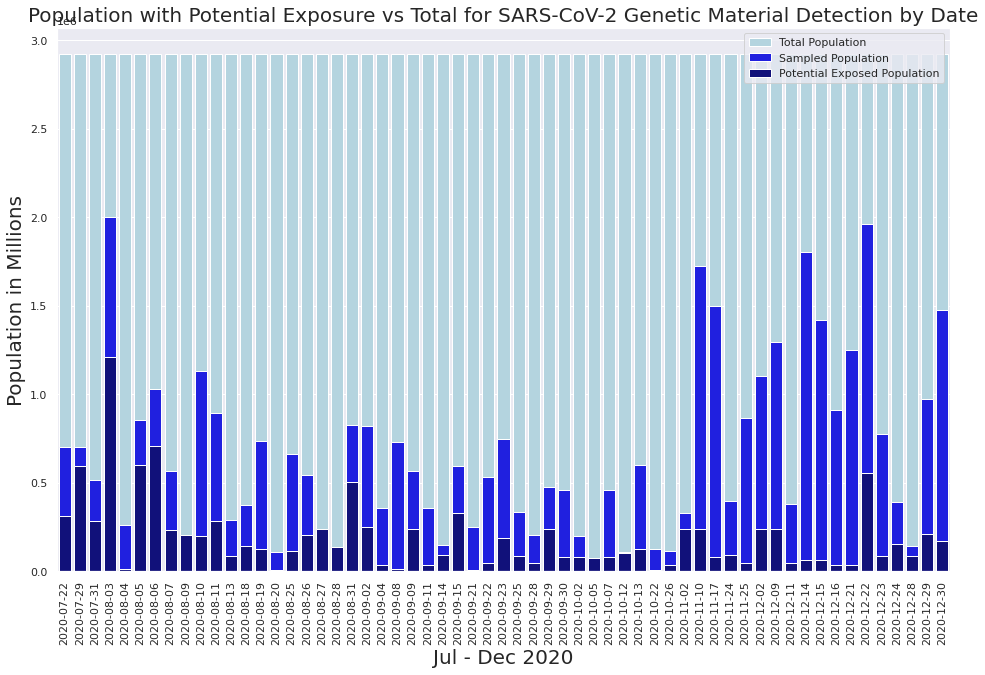

In [42]:
sns.set(context='notebook')

plt.figure(figsize=(16,10))
sns.barplot(x=df_plot.index,y='Total_Population', label = 'Total Population', data=df_plot,color='lightblue',edgecolor = 'w')
sns.barplot(x=df_plot.index,y='Sampled_Population', label='Sampled Population', data=df_plot,color='blue', edgecolor = 'w')
sns.barplot(x=df_plot.index,y='Exp_Population', label = 'Potential Exposed Population', data=df_plot,color='darkblue',edgecolor = 'w')
plt.title('Population with Potential Exposure vs Total for SARS-CoV-2 Genetic Material Detection by Date',fontsize = 20)
plt.xticks(rotation=90)
plt.xlabel('Jul - Dec 2020', fontsize = 20)
plt.ylabel('Population in Millions', fontsize = 20)
plt.legend()
plt.show()

### Make pivot table for sites vs date to make a display sites as column and sampling dates as rows

In [43]:
# sort sites by populaiton before pivot
pivot = df.pivot(index='Sampling date', columns = 'Site', values= 'Result_mapped')

### Create table conditional mapping function for an eye-catching table for quick review

In [44]:
def color_table(cell):
    if cell != np.nan:
        if cell == True:
            return 'background: red; color:black'
        else:
            if cell == False:
                return 'background: green; color:black'
            else:
                return 'background: grey; color: grey'

In [45]:
# Change the format to print datetime without hh:mm:ss
pivot.index = pivot.index.strftime("%Y-%m-%d")

In [46]:
# pivot.transpose().style.applymap(color_table)
pivot.style.set_table_styles(
    [dict(selector="th",props=[('max-width', '45px')]),
        dict(selector="th.col_heading",
                 props=[("writing-mode", "vertical-rl"), 
                        ('transform', 'rotateZ(-90deg)'),
                        ])]
).applymap(color_table)

Site,Bundaberg,Bundamba,Caboolture South,Cairns North,Cairns South,Cannonvale,Cannonvale upstream location A,Cannonvale upstream location B,Capalaba,Carole Park,Cleveland,Cleveland Bay,Condon,Coombabah,Elanora,Fairfield,Gibson Island,Goodna,Kawana,Loganholme,Luggage Point,Mackay South,Maroochydore,Maryborough,Merrimac,Mount St John,Nambour,Noosa,Oxley Creek,Pimpama,Port Douglas,Pulgul,Redcliffe,Rockhampton North,Sandgate,Stanthorpe,Thorneside,Victoria Point,Wacol,Warwick,Wynnum
Sampling date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,True,nan,nan,nan,nan,True,nan,nan,nan,nan,False,nan,nan,nan,nan,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-07-29,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,False,nan,nan,nan,nan,True,nan,nan,nan,nan,True,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-07-30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-07-31,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,nan,True,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-08-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-08-02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-08-03,nan,False,nan,nan,nan,nan,nan,nan,nan,True,nan,nan,nan,True,True,False,False,False,nan,True,True,nan,nan,nan,True,nan,nan,nan,False,False,nan,nan,nan,nan,False,nan,nan,nan,True,nan,False
2020-08-04,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-08-05,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,True,True,nan,nan,nan,nan,False,nan,nan,nan,nan,True,nan,nan,nan,nan,True,nan,nan,nan,nan,True,nan,nan,nan,nan,nan,nan


### 1.5 Insight

*## Your insights from the analysis. Ensure that you address the question ##*





### Answer
The bar graph with the title 'Population with Potential Exposure vs. Total for SARS-CoV-2 Genetic Material Detection by Date' provides the derived insight where the population with the potential of exposure is colored as dark blue. Based on this, the bird's eye view can be derived by the Queensland Administration and Heath.

For more specific site-related risk by date can be viewed in the formatted pivot table output where locations with detections are marked in red background and not detected in green. Locations not sampled are marked as grey.

With a combination of the above two visualisations, stakeholders can interpret the information to suit their needs. For example, Queensland administration and health can promote the public to come forward at specific sites for COVID testing when they see the population at risk of exposure increases.

List of the most risky sites has been calculated in the analysis section. Much 

Validation of the insight with data from the internet. 

Data Source: https://covidlive.com.au/report/daily-cases/qld 

New case were detected as 1 on 5 Aug 2020, 2 on 14 Aug 2020, 1 on 26 Aug 2020, 8 on 9 Sep 2020, 3 on 12 Sep 2020, 2 on 2 Oct 2020, 3 on 10 Dec 2020,


---
## QUESTION 2

#### Question: 
Using *The Guardian* API, compare this year's headlines about COVID between Australia and the UK. What can we learn about how the pandemic is impacting Australia and UK?

#### Data:
[The Guardian OpenPlatform](https://open-platform.theguardian.com/access/)


In [47]:
# import libraries for this question here
import re

### 2.1 Question

*## Your interpretation of the question here ##*

### My Thought Process

Understand the TheGuardian API, how it works, whats tags are available, how the website and its data are structured. Once complete, plan accordingly to pull all data related to COVID from the API. Capture data from 1 Jan 2021 till date.

Once downloaded, view the data to understand how it is formatted—select words representing both positive and negative sentiment during a pandemic. We could count the frequency of such words in the data captured to calculate the degree of positive and negative sentiment. This data can be categorized on based daily or weekly basis to track how the sentiment changed with time. In order to understand this methodology further, I researched the internet for news sentiment indicators.

I reviewed some sentiment words and formula from https://www.rba.gov.au/publications/bulletin/2020/jun/news-sentiment-and-the-economy.html

Based on my research, words to be used for sentimental analysis are below:

   - Negative: Death, Lockdown, crisis, loss, shut, down, problem, late, unemployment, fear, decline, challenge, recession

   - Positive:  Growth, up, great, improve, benefit, easy, able, best, opportunity, gain, strong, boost, confident, achieve, rebound, strength 
   - Positive itself was omitted as it could mean be picked on COVID positive
    
Based on the above research, I plan to create a news sentiment indicator derived from the analysis of covid news headlines. It will be applied to the dataset for each country to compare.

### Question: Compare this year's news headlines for Australia and the UK to determine which country has more positive vs. negative covid news?

Key Stakeholders: Government, Health Department, and research groups.

Significance: Categorisation of covid news headlines as positive or negative provides an insight into how pandemic has impacted life in the country. It helps us compare the pandemic impact on countries.

Interpretation: I plan to capture the headlines from the Guarding API starting from 1st Jan 2021 till date and organize the data into a structured format. Perform analysis to understand the data and derive insight to answer which country has more positive vs. negative news related to pandemic. 


### 2.2 Data

### Access the data via API

### Load my "TheGuardian" API key saved in file guardian_key.txt

In [48]:
with open("/home/jovyan/ifn619/data/guardian_key.txt","r") as file: # Examiner to insert their key here
    api_key = file.read()
len(api_key)

36

### Create tags as tag search function with query and api_key input 

In [49]:
def tags(query,api_key):
    tags_list = []
    tags_list.clear()
    baseurl = 'https://content.guardianapis.com/tags?'
    page = 1
    url = baseurl+'q='+query+'&page='+str(page)+'&api-key='+api_key
    response = requests.get(url)
    data = json.loads(response.content)
    pages = data['response']['pages']
    for i in range(1,pages):
        page=i
        url = baseurl+'q='+query+'&page='+str(page)+'&api-key='+api_key
        response = requests.get(url)
        data = json.loads(response.content)
        results = data['response']['results']
        for n in results:
            tags_list.append(n['id'])
    return tags_list

### Search tags for UK

In [50]:
UK_tags = tags('UK',api_key)
len(UK_tags)

730

### Search tags containing coronavirus in UK tag list

In [51]:
for tag in UK_tags:
    if re.search("coronavirus" or "covid",tag):
        print(tag)

### Note:
    - No UK tag found containing covid or coronavirus

### Search tags for Australia

In [52]:
Australia_tags = tags('Australia',api_key)
len(Australia_tags)

650

### Search tags containing coronavirus in Australia tag list

In [53]:
for tag in Australia_tags:
    if re.search("coronavirus" or "covid",tag):
        print(tag)

australia-news/series/coronavirus-australia-latest-at-a-glance


### Notes:
 - Only 1 tag found containing coronavirus related to Australia

### Search tags for Coronavirus

In [54]:
Coronavirus_tags = tags('coronavirus',api_key)
len(Coronavirus_tags)

10

### Notes:
     - 10 tags found with coronavirus.
     - All the coronavirus tags are related to news from world section, campaign, sport, tracking, travel or us-news

### Use search function to find keys words from the tags list

In [55]:
for tag in Coronavirus_tags:
    if re.search("uk",tag):
        print(tag)

### Note:
    - Based on the tag list, I choose 'coronavirus + covid' as my query for search because it will be able to capture news from all over the world related to pandemic.

### Import the data from TheGuardian API for Coronavirus

In [56]:
data_list_coronavirus = [] #used for storing the data for Australia

baseurl = 'https://content.guardianapis.com/search?'
query = 'coronavirus + covid'
#section = "australia-news"
#tag = "news/coronavirus"
time = "2021-01-01"
page=1
url = baseurl+'&from-date='+time+'&page='+str(page)+'&q='+query+'&api-key='+api_key
#print(url)
response = requests.get(url)
data = json.loads(response.content)
pages = data['response']['pages']
print(pages)
for i in range(1,pages):
    page=i
    url = baseurl+'&from-date='+time+'&page='+str(page)+'&q='+query+'&api-key='+api_key
    response = requests.get(url)
    data = json.loads(response.content)
    results = data['response']['results']
    for n in results:
        data_list_coronavirus.append(n['id'])
    

548


In [57]:
#View the list
data_list_coronavirus[0]

'world/2021/apr/19/covid-uk-coronavirus-cases-deaths-and-vaccinations-today'

In [58]:
# check the length of the list
len(data_list_coronavirus)

5470

## Clean/prepare the data for analysis

### Prepare the Coronavirus data by importing into dataframe based on date, headline, section and country

In [59]:
covid_dict = dict
covid_dict={'Section':None,'Date':None,'Headline':None}
aus_dict = dict
aus_dict={'Section':None,'Date':None,'Headline':None}
uk_dict = dict
uk_dict={'Section':None,'Date':None,'Headline':None}

df_covid = pd.DataFrame() # Take all the lines into covid dataset
df_aus = pd.DataFrame() # take containing australia into this dataset
df_uk = pd.DataFrame() # take containing uk into this dataset

for i in data_list_coronavirus:
    line_check = re.match(r"[a-z]*-*[a-z]*/[0-9]{4}/[a-z]{3}/[0-9]*/*[a-z]*[0-9]*",i) # Match the format to accept the item from list
    if line_check:
        split = i.split("/")    
        if re.search("uk",split[4]): # if the item in list contains uk
            uk_dict['Section']=str(split[0])
            uk_dict['Date']= (split[3]+'.'+split[2]+'.'+split[1])
            uk_dict['Headline'] = split[4].replace("-"," ")
            df_uk=df_uk.append(uk_dict,ignore_index=True)
        if re.search("australia",split[4]): # if the item in list contains australia
            aus_dict['Section']=str(split[0])
            aus_dict['Date']= (split[3]+'.'+split[2]+'.'+split[1])
            aus_dict['Headline'] = split[4].replace("-"," ")
            df_aus=df_aus.append(aus_dict,ignore_index=True)
        if re.search("covid" or "coronavirus",split[4]):  # if the item in list contains coronavirus or covid      
            covid_dict['Section']=str(split[0])
            covid_dict['Date']= (split[3]+'.'+split[2]+'.'+split[1])
            covid_dict['Headline'] = split[4].replace("-"," ")
            df_covid=df_covid.append(covid_dict,ignore_index=True)  
    else:
        line_check = re.match(r"[a-z]*-*[a-z]*/[a-z]*-*[a-z]*/[0-9]{4}/[a-z]{3}/[0-9]*/*[a-z]*[0-9]*",i) # Match the format to accept the item from list
        if line_check:
            split = i.split("/")
            if re.search("uk",split[5]): # if the item in list contains uk
                uk_dict['Section']=str(split[0]+' '+split[1])
                uk_dict['Date']= (split[4]+'.'+split[3]+'.'+split[2])
                uk_dict['Headline'] = split[5].replace("-"," ")
                df_uk=df_uk.append(uk_dict,ignore_index=True)
            if re.search("australia",split[5]): # if the item in list contains australia
                aus_dict['Section']=str(split[0]+' '+split[1])
                aus_dict['Date']= (split[4]+'.'+split[3]+'.'+split[2])
                aus_dict['Headline'] = split[5].replace("-"," ")
                df_aus=df_aus.append(aus_dict,ignore_index=True)
            if re.search("covid" or "coronavirus",split[5]): # if the item in list contains coronavirus or covid  
                covid_dict['Section']=str(split[0]+' '+split[1])
                covid_dict['Date']= (split[4]+'.'+split[3]+'.'+split[2])
                covid_dict['Headline'] = split[5].replace("-"," ")
                df_covid=df_covid.append(covid_dict,ignore_index=True)

### Review the data shape of datasets

In [60]:
df_uk.shape

(807, 3)

In [61]:
df_aus.shape

(307, 3)

In [62]:
df_covid.shape

(2814, 3)

### Review the datasets by calling head function

In [63]:
df_covid.head()

,Date,Headline,Section
0,19.apr.2021,covid uk coronavirus cases deaths and vaccinat...,world
1,17.feb.2021,coronavirus victoria covid melbourne lockdown ...,australia-news
2,05.apr.2021,covid 19 qld brisbane lockdown restrictions qu...,australia-news
3,16.dec.2020,covid chaos a timeline of the uks handling of ...,world ng-interactive
4,05.apr.2021,covid 19 qld hotspots list brisbane coronaviru...,australia-news


In [64]:
df_uk.head()

,Date,Headline,Section
0,19.apr.2021,covid uk coronavirus cases deaths and vaccinat...,world
1,16.dec.2020,covid chaos a timeline of the uks handling of ...,world ng-interactive
2,11.mar.2021,uk covid live news coronavirus starmer labour ...,politics live
3,01.apr.2021,uk covid live keir starmer boris johnson coron...,politics live
4,19.jan.2021,uk covid live coronavirus death rate worst wo...,politics live


In [65]:
df_aus.head()

,Date,Headline,Section
0,15.feb.2021,australia covid 19 lockdown rules coronavirus ...,australia-news
1,04.feb.2021,perth lockdown covid 19 rules restrictions wes...,australia-news
2,04.feb.2021,covid 19 perth wa hotspots list western austra...,australia-news
3,04.jan.2021,australia coronavirus live covid 19 nsw victor...,australia-news live
4,04.jan.2021,australia coronavirus live covid 19 nsw victor...,australia-news live


### Review the dataset by calling .info function

In [66]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      807 non-null    object
 1   Headline  807 non-null    object
 2   Section   807 non-null    object
dtypes: object(3)
memory usage: 19.0+ KB


In [67]:
df_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      307 non-null    object
 1   Headline  307 non-null    object
 2   Section   307 non-null    object
dtypes: object(3)
memory usage: 7.3+ KB


In [68]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2814 non-null   object
 1   Headline  2814 non-null   object
 2   Section   2814 non-null   object
dtypes: object(3)
memory usage: 66.1+ KB


### Notes:
 - Based on the datatypes we need to change the Date column to a datetime object
 - Data looks ok so far from the head() and .info() functions, but requires further review 

### Change the Date column datatype to datetime object

In [69]:
df_covid['Date']=pd.to_datetime(df_covid['Date'],format = "%d.%b.%Y")

In [70]:
df_uk['Date']=pd.to_datetime(df_uk['Date'],format = "%d.%b.%Y")

In [71]:
df_aus['Date']=pd.to_datetime(df_aus['Date'],format = "%d.%b.%Y")

In [72]:
df_covid['Date'].dt.year.unique()

array([2021, 2020])

In [73]:
df_aus['Date'].dt.year.unique()

array([2021])

In [74]:
df_uk['Date'].dt.year.unique()

array([2021, 2020])

### Notes:
 -  Date column contains value from yeay 2020 and 2021.
 - We need to drop rows with 2020 data.

### Review the Headline column for the datasets

In [75]:
df_covid['Headline'].value_counts()

at the coalface what the australian expert in whos covid mission in china hopes to find    3
first thing boost for biden as covid aid bill passes                                       3
tuesday briefing david cameron greensill covid                                             3
arrivals to uk will need to show a negative covid test before entry                        3
dire warning that london hospitals could be overwhelmed by covid                           3
                                                                                          ..
nsw covid restrictions to ease in sydney after 10 straight days of no local cases          1
no free critical care beds 15 nhs england trusts covid                                     1
uks green plan offers mixed hopes for post covid jobs boom                                 1
covid vaccinations discrepancies london east of england lag nhs regions                    1
cdc chief covid us coronavirus cases potential fourth surge           

In [76]:
df_aus['Headline'].value_counts()

nearly one in five chinese australians threatened or attacked in past year survey finds                                           3
at the coalface what the australian expert in whos covid mission in china hopes to find                                           3
australia covid vaccine rollout distribution when can you get the coronavirus jab                                                 3
confronting alleged elder abuse cases rise sharply in australia amid covid                                                        3
australia news live half price airline tickets in bid to revive tourism pm under pressure over porter                             3
                                                                                                                                 ..
australias chief medical officer defends astrazenecas covid vaccine amid efficacy concerns                                        1
italy blocks export of 250000 astrazeneca vaccine doses to australia        

In [77]:
df_uk['Headline'].value_counts()

revealed the data that shows how covid bounced back after the uks lockdowns       3
matt hancock ex neighbour alex bourne under investigation uk medical regulator    3
what does modernas covid jab mean for the uk vaccine rollout                      3
demand for uk nursing degrees rises by a third in pandemic                        3
uk urged take lead helping poor countries fund climate action cop26               3
                                                                                 ..
uk closes covid travel corridors and requires foreign arrivals to isolate         1
imams mosques uk reassure muslim worshippers covid vaccines                       1
uk covid coronavirus live news updates boris johnson vaccines schools             1
long covid uk impact society                                                      1
when will i be offered the coronavirus vaccine in the uk                          1
Name: Headline, Length: 587, dtype: int64

### Notes:
 - All the 3 datasets have duplicate headlines that will need treatement

### Drop duplicates and rows corresponding to year 2020

In [78]:
df_covid.drop(df_covid[df_covid['Date'].dt.year == 2020].index,axis = 0,inplace=True)

In [79]:
df_uk.drop(df_uk[df_uk['Date'].dt.year == 2020].index,axis = 0,inplace=True)

In [80]:
df_covid.drop_duplicates(inplace = True)

In [81]:
df_uk.drop_duplicates(inplace = True)

In [82]:
df_aus.drop_duplicates(inplace = True)

In [83]:
# Sort values by date
df_aus = df_aus.sort_values(by='Date')
df_uk = df_uk.sort_values(by='Date')
df_covid = df_covid.sort_values(by='Date')

In [84]:
# Reset index after the cleaning
df_covid = df_covid.reset_index(drop = True)
df_uk = df_uk.reset_index(drop = True)
df_aus = df_aus.reset_index(drop = True)

### Check data to confirm cleaning is complete

In [85]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2037 non-null   datetime64[ns]
 1   Headline  2037 non-null   object        
 2   Section   2037 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 47.9+ KB


In [86]:
df_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      223 non-null    datetime64[ns]
 1   Headline  223 non-null    object        
 2   Section   223 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 5.4+ KB


In [87]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      581 non-null    datetime64[ns]
 1   Headline  581 non-null    object        
 2   Section   581 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 13.7+ KB


### Notes:
 - Data is cleaned from duplicates and null values
 - Date in datetime object format

### 2.3 Analysis

### Define Sentiment Calculation Function

### Calculate sentiment based on frequency of positive and negative words for Australia

In [88]:
def sentiment(df):
    positive_senti = ['growth', 'up', 'great', 'improve', 'benefit', 'gain','best', 'opportunity', 'strong', 'boost', 'confident', 'achieve', 'rebound', 'strength', 'rise','open']
    negative_senti = ['decline','down','death', 'lockdown', 'crisis', 'loss', 'shut',  'problem', 'late', 'unemployment', 'fear',  'challenge','recession', 'close', 'fail']
    days = []
    days.clear()
    days = df['Date'].dt.date.unique() # takes unique dates into an array
    days.sort()
    dict_sentiment = {}
    dict_sentiment.clear()
    for day in days: # iterate over the unique days from dataframe
        headline = ''
        for item in (df[df['Date'].dt.date == day].index): # filter the dataframe for the particular date, this may have more than 1 row
            #print(item)
            string = df.iloc[item]['Headline']
            headline = headline +' '+ string # combine all the headlines from these all rows corresponding to the particular calenday day
        #print("\n\n\n",headline)
        words = headline.split(" ")
        positive_count=0
        negative_count=0    
        wordcount = 0
        for word in words:
            wordcount = wordcount+1
            for i in positive_senti: # iterate over +ve words checklist
                if word ==i:
                    positive_count = positive_count + 1;
            for j in negative_senti: # iterate over -ve words checklist
                if word == j:
                    negative_count = negative_count + 1;
        dict_sentiment[day] = (positive_count - negative_count)/wordcount # calculate the News Sentiment
    return dict_sentiment

### Calculate sentiment based on frequency of positive and negative words for Australia

In [89]:
dict_sentiment_aus = sentiment(df_aus)

### Calculate sentiment based on frequency of positive and negative words for the UK

In [90]:
dict_sentiment_uk = sentiment(df_uk)

### Calculate sentiment based on frequency of positive and negative words for the World

In [91]:
dict_sentiment_world = sentiment(df_covid)

### Import the news sentiment results for the UK, Australia and the world to a dataframe

In [92]:
df_senti = pd.DataFrame([dict_sentiment_uk,dict_sentiment_aus,dict_sentiment_world]) # Import the data from the 3 dictionaries
df_senti = df_senti.transpose()
df_senti = df_senti.rename(columns={0:'UK',1:'AUS',2:'World'}) # Rename the columns
df_senti = df_senti.sort_index()
df_senti.tail(20)

,UK,AUS,World
2021-03-31,-0.045455,0.000000,-0.005952
2021-04-01,0.000000,-0.076923,-0.006061
2021-04-02,0.000000,NaN,0.000000
2021-04-03,0.000000,0.000000,0.008333
2021-04-04,0.000000,NaN,-0.022222
2021-04-05,NaN,0.000000,-0.006024
2021-04-06,-0.012987,0.000000,-0.011299
2021-04-07,0.000000,0.000000,-0.005495
2021-04-08,0.013514,0.000000,0.000000
2021-04-09,0.000000,0.009901,0.000000


In [93]:
df_senti.describe()

,UK,AUS,World
count,108.000000,89.000000,109.000000
mean,-0.007956,0.000980,-0.007837
std,0.018789,0.025796,0.008963
min,-0.083333,-0.090909,-0.034351
25%,-0.014085,0.000000,-0.014337
50%,0.000000,0.000000,-0.008403
75%,0.000000,0.000000,0.000000
max,0.034483,0.093750,0.013423


### Count number of total days, positive and negative sentiment days

In [94]:
dict_senti = {'uk_total':'','aus_total':'','world_total':'','uk_positive':'','uk_negative':'','aus_positive':'','aus_negative':'','world_positive':'','world_negative':''}
dict_senti['uk_total'] = df_senti.UK.count()
dict_senti['aus_total'] = df_senti.AUS.count()
dict_senti['world_total'] = df_senti.World.count()
dict_senti['world_positive'] = df_senti[df_senti.World >0]['World'].count()
dict_senti['uk_positive'] = df_senti[df_senti.UK >0]['UK'].count()
dict_senti['aus_positive'] = df_senti[df_senti.AUS >0]['AUS'].count()
dict_senti['world_negative'] = df_senti[df_senti.World <0]['World'].count()
dict_senti['uk_negative'] = df_senti[df_senti.UK <0]['UK'].count()
dict_senti['aus_negative'] = df_senti[df_senti.AUS <0]['AUS'].count()

In [95]:
dict_senti

{'uk_total': 108,
 'aus_total': 89,
 'world_total': 109,
 'uk_positive': 13,
 'uk_negative': 43,
 'aus_positive': 18,
 'aus_negative': 15,
 'world_positive': 11,
 'world_negative': 74}

### 2.4 Visualisation

### Plot the sentiment calculated by day for the UK, Australia and the World

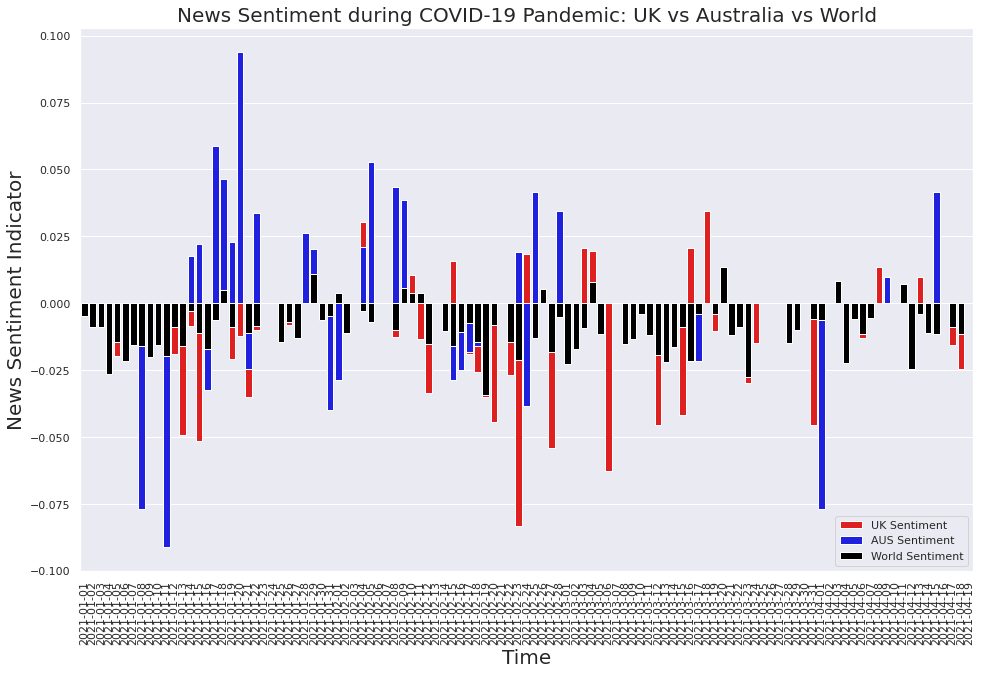

In [96]:
sns.set(context='notebook')

plt.figure(figsize=(16,10))
sns.barplot(x=df_senti.index,y=df_senti.UK, label = 'UK Sentiment', data=df_senti,color='red')
sns.barplot(x=df_senti.index,y=df_senti.AUS, label='AUS Sentiment', data=df_senti,color='blue')
sns.barplot(x=df_senti.index,y=df_senti.World, label='World Sentiment', data=df_senti,color='black')
plt.title('News Sentiment during COVID-19 Pandemic: UK vs Australia vs World',fontsize = 20)
plt.xticks(rotation=90)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('News Sentiment Indicator', fontsize = 20)
plt.legend()
plt.show()

### Plot the sentiment calculated for the UK, Australia and the World from start of the year till date

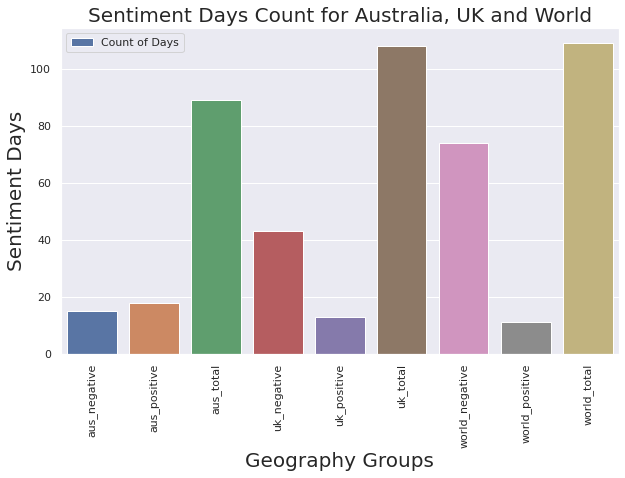

In [97]:
sns.set(context='notebook')

plt.figure(figsize=(10,6))
senti_plot = pd.DataFrame(sorted(dict_senti.items()))
#print(senti_plot.head(9))
sns.barplot(x=senti_plot[0],y=1,label = 'Count of Days', data=senti_plot,edgecolor = 'w')
plt.title("Sentiment Days Count for Australia, UK and World", fontsize = 20)
plt.xticks(rotation = 90)
plt.xlabel('Geography Groups',fontsize = 20)
plt.ylabel('Sentiment Days', fontsize = 20)
plt.legend()
plt.show()

### 2.5 Insight

*## Your insights from the analysis. Ensure that you address the question ##*

Based on the visualisations we can have a comparison of the UK vs. Australia vs. World.

 - Australia had 18 positive and 15 negative sentiment days out of a total of 89 days.

 - UK has 43 negative and 13 positive sentiment days out of a total of 108 days.
  
 - World has 74 negative and 11 positive sentiment days out of a total of 109 days.
 

We could say that Covid 19 pandemic has impacted UK more than Australia when comparing the covid news headlines.